Simple self test exercise : <br>
(1) data cleaning <br>
(2) data transformation <br>
(3) chart plotting ( line chart ) <br>

In [29]:
import datetime as dt
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
# the first data is wrong , for now , we just detect and drop it        
df = pd.DataFrame({'date': ['00-01-2020','15-01-2020','02-02-2020','03-03-2020','04-04-2020','05-05-2020','06-06-2020','07-07-2020','08-08-2020','01-01-2021','09-09-2021','11-11-2021','12-12-2021'], 
'count': [10,10,1,4,5,6,12,34,11,2,1,12,22]})


In [31]:
# STEP I : Data Cleaning 
def isDateFieldValidSimple(dateStr):
    try:
        date_object = datetime.strptime(dateStr, '%d-%m-%Y')
        #print("This is the correct date string format.")
        return True
    except ValueError:
        #print("This is the incorrect date string format:",dateStr)
        return False;
    
def isDateFieldValidSimple2(row):
    try:
        date_object = datetime.strptime(row['date'], '%d-%m-%Y')
        #print("This is the correct date string format.")
        return 0
    except ValueError:
        #print("This is the incorrect date string format:",dateStr)
        return 1;
       

dfCleaned = df[df['date'].apply(isDateFieldValidSimple) == True];
#or df[df.apply(isDateFieldValidSimple2, axis=1)==0]

print(dfCleaned)
type(dfCleaned)



          date  count
1   15-01-2020     10
2   02-02-2020      1
3   03-03-2020      4
4   04-04-2020      5
5   05-05-2020      6
6   06-06-2020     12
7   07-07-2020     34
8   08-08-2020     11
9   01-01-2021      2
10  09-09-2021      1
11  11-11-2021     12
12  12-12-2021     22


pandas.core.frame.DataFrame

In [32]:
# STEP II , Data transform , assign year and month and monthString column
def convertDateStrToYear(dateStr):
    date_object = datetime.strptime(dateStr, '%d-%m-%Y')
    return date_object.year

def convertDateStrToMonthDigit(dateStr):
    date_object = datetime.strptime(dateStr, '%d-%m-%Y')
    return date_object.month


def convertDateStrToMonthStr(dateStr):
    date_object = datetime.strptime(dateStr, '%d-%m-%Y')
    m = date_object.month
    if m == 1: 
        return 'Jan'
    elif m == 2: 
        return 'Feb'
    elif m == 3: 
        return 'Mar'
    elif m == 4: 
        return 'Apr'
    elif m == 5: 
        return 'May'
    elif m == 6: 
        return 'Jun'
    elif m == 7: 
        return 'Jul'
    elif m == 8: 
        return 'Aug'
    elif m == 9: 
        return 'Sep'
    elif m == 10: 
        return 'Oct'
    elif m == 11: 
        return 'Nov'
    else: 
        return 'Dec'

dfCleaned['year'] = dfCleaned['date'].apply(convertDateStrToYear)
dfCleaned['month'] = dfCleaned['date'].apply(convertDateStrToMonthDigit)
dfCleaned['monthStr'] = dfCleaned['date'].apply(convertDateStrToMonthStr)

print(dfCleaned)

          date  count  year  month monthStr
1   15-01-2020     10  2020      1      Jan
2   02-02-2020      1  2020      2      Feb
3   03-03-2020      4  2020      3      Mar
4   04-04-2020      5  2020      4      Apr
5   05-05-2020      6  2020      5      May
6   06-06-2020     12  2020      6      Jun
7   07-07-2020     34  2020      7      Jul
8   08-08-2020     11  2020      8      Aug
9   01-01-2021      2  2021      1      Jan
10  09-09-2021      1  2021      9      Sep
11  11-11-2021     12  2021     11      Nov
12  12-12-2021     22  2021     12      Dec


<ipython-input-32-0ba4be540577>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCleaned['year'] = dfCleaned['date'].apply(convertDateStrToYear)
<ipython-input-32-0ba4be540577>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCleaned['month'] = dfCleaned['date'].apply(convertDateStrToMonthDigit)
<ipython-input-32-0ba4be540577>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [43]:


#dfYear2020 =  dfCleaned[(dfCleaned["year"] == 2020) ]
#dfYear2021 =  dfCleaned[(dfCleaned["year"] == 2021) ]
#print(dfYear2020)
dfCleaned['mySum'] = dfCleaned.groupby(['year','monthStr'])['count'].transform('sum')
dfYear2020 =  dfCleaned[(dfCleaned["year"] == 2020) ]
dfYear2020.drop_duplicates(subset = ["month"])
print(dfYear2020);

         date  count  year  month monthStr  mySum
1  15-01-2020     10  2020      1      Jan     10
2  02-02-2020      1  2020      2      Feb      1
3  03-03-2020      4  2020      3      Mar      4
4  04-04-2020      5  2020      4      Apr      5
5  05-05-2020      6  2020      5      May      6
6  06-06-2020     12  2020      6      Jun     12
7  07-07-2020     34  2020      7      Jul     34
8  08-08-2020     11  2020      8      Aug     11


<ipython-input-43-9d6d6eba5cb9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCleaned['mySum'] = dfCleaned.groupby(['year','monthStr'])['count'].transform('sum')


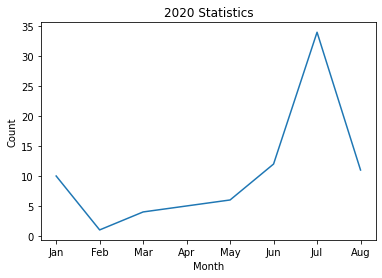

In [46]:
plt.plot(dfYear2020['monthStr'],dfYear2020['mySum'])
plt.title('2020 Statistics')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

TODO : <br>
(1) Make sure months are in order <br> 
(2) Fill in Month holes <br>
(3) 2020 and 2021 data<br) <br>
(4) dynamically split data 2020/2021